# Gram-Schmidt Orthogonalization and QR Decompositon

Manual implementation of the linear algebra techniques

In [237]:
import numpy as np
import pandas as pd
import seaborn as sns

In [238]:
def gram_schmidt_orthogonalization(A: np.ndarray, orthonormal: bool = True) -> np.ndarray:
    """
    Orthogonal basis U_i = A_i - sum_0_i-1(A_i.T @ U_i-1 / U_i-1.T @ U_i-1 * U_i-1)

    Can be thought of as retaining any information not already explained by the 
    previously calculated orthogonal vectors. In other words, we remove any information 
    already contained in previously calculated orthogonal vectors. This is the "partialling" out idea. 

    This is akin to sequential multivariate OLS for a standardized A matrix:
    - A_i.T @ U_i-1 is proportional to cov(A_i, U_i-1)
    - U_i-1.T @ U_i-1 is proportional to like var(U_i-1)
    - B_hat = A_i.T @ U_i-1 / U_i-1.T @ U_i-1 = cov(A_i, U_i-1) / var(U_i-1)
    - Therefore, A_i = sum_0_i-1(B_hat_j @ U_j) 
    - Thus, to orthogonalize U_i to all other U's, take the residual = A_i - sum_0_i-1(B_hat_j @ U_j)
    """
    
    # Initialize the orthognal matrix / basis
    A_orthogonal: np.ndarray = np.empty(shape=A.shape)

    for column in np.arange(start=0, stop=A.shape[1], step=1):
        
        # Initialize the orthogonal vector with the current column
        A_orthogonal[:, column] = A[:, column]
        
        for previous_column in np.arange(start=0, stop=column, step=1):

            # Subtract information that the previous orthogonal vectors capture from the current vector
            A_orthogonal[:, column] -= (
                (
                    (A[:, column].T @ A_orthogonal[:, previous_column])
                    / (A_orthogonal[:, previous_column].T @ A_orthogonal[:, previous_column])
                ) * A_orthogonal[:, previous_column]
            )

    # Calculate unit norm orthogonal vectors
    if orthonormal:
        A_orthogonal /= np.linalg.norm(x=A_orthogonal, ord=2, axis=0)

    return A_orthogonal

Execute Gram-Schmidt Orthogonalization on a simple matrix

In [239]:
A: np.ndarray = np.array(
    [
        [1, 1, 1],
        [-1, 0, 1],
        [1, 1, 2]
    ]
)
A_orthonormal: np.ndarray = gram_schmidt_orthogonalization(A=A, orthonormal=True)
A_orthonormal, np.linalg.norm(x=A_orthonormal, ord=2, axis=0)

(array([[ 5.77350269e-01,  4.08248290e-01, -7.07106781e-01],
        [-5.77350269e-01,  8.16496581e-01,  3.14018492e-16],
        [ 5.77350269e-01,  4.08248290e-01,  7.07106781e-01]]),
 array([1., 1., 1.]))

Execute QR Decomposition/Factorization to validate the Gram-Schmidt Orthogonalization implementation

In [240]:
Q, R = np.linalg.qr(a=A)
Q, R, np.linalg.norm(Q, axis=0)

(array([[-0.57735027, -0.40824829, -0.70710678],
        [ 0.57735027, -0.81649658,  0.        ],
        [-0.57735027, -0.40824829,  0.70710678]]),
 array([[-1.73205081, -1.15470054, -1.15470054],
        [ 0.        , -0.81649658, -2.04124145],
        [ 0.        ,  0.        ,  0.70710678]]),
 array([1., 1., 1.]))

Notice A_orthonormal != Q; however, their magnitudes of each element are equivalent... 

This exemplifies the scale invariance of orthogonal bases... 

Both are orthonormal, so they're both valid... we just need to scale one of the orthonormal matrices... 

A_orthonormal_0 = -1 * Q_0

A_orthonormal_1 = -1 * Q_1

A_orthonormal_2 = Q_2

In [241]:
assert np.allclose(A_orthonormal[:, 0], -Q[:, 0])
assert np.allclose(A_orthonormal[:, 1], -Q[:, 1])
assert np.allclose(A_orthonormal[:, 2], Q[:, 2]) 

Let's simulate a random matrix that we may want to orthogonalize and generate zero correlation with (e.g., asset returns) 

In [242]:
A: np.ndarray = np.random.normal(loc=0.0, scale=1.0, size=(100, 10))

# Standardize such that Gram-Schmidt yields 0 correlation AND orthogonality
A: np.ndarray = (A - A.mean(axis=0)) / A.std(ddof=1, axis=0) 
A

array([[-1.73012857e+00, -3.57719044e-01,  5.51309564e-02,
         6.16793181e-01,  4.83239023e-02,  3.60664144e-02,
         5.58365180e-01, -2.26681908e-01,  4.79769935e-01,
        -2.90994609e-01],
       [-5.69482156e-02, -3.61386353e-01,  4.89752530e-01,
         2.32996627e-01,  5.60105332e-01,  1.27892626e+00,
         8.08975714e-01, -3.65377850e-01,  1.62470870e+00,
         1.15271413e+00],
       [-4.10256982e-01, -6.25839615e-01,  1.71785272e+00,
         1.27692254e+00, -7.60780955e-01, -7.05224507e-01,
        -7.59764453e-01,  8.99614124e-01,  1.05474537e-01,
         1.80723883e-01],
       [ 7.11610937e-01,  6.27577487e-02,  1.55973006e+00,
        -1.60974839e-01, -2.42232527e-01, -7.31794084e-01,
        -4.61406711e-01,  8.03329123e-02, -9.20299765e-01,
         1.29709524e-01],
       [-1.56890964e-01,  1.25775858e-01,  4.04817132e-02,
        -1.03388707e+00,  1.09841762e+00, -1.08984977e+00,
         1.21048355e+00, -2.77778279e-01,  9.91297100e-01,
         1.

Execute Gram-Schmidt Orthogonalization

In [243]:
A_orthonormal: np.ndarray = gram_schmidt_orthogonalization(A=A, orthonormal=True)
A_orthonormal, np.linalg.norm(A_orthonormal, ord=2, axis=0)

(array([[-1.73884464e-01, -4.53838391e-02,  6.15821701e-02,
          4.95328968e-02,  1.56485963e-02,  2.76431440e-02,
          6.51204281e-02, -7.07360533e-04,  7.64135027e-03,
         -4.21239177e-02],
        [-5.72351102e-03, -3.66822265e-02,  5.07468593e-02,
          1.97551124e-02,  5.12037419e-02,  1.55412585e-01,
          7.40348107e-02, -2.61833325e-02,  1.43723963e-01,
          1.21307227e-01],
        [-4.12323781e-02, -6.52147925e-02,  1.91389744e-01,
          1.22668958e-01, -8.73382608e-02, -5.23479565e-02,
         -3.39977293e-02,  9.91598699e-02, -5.21705655e-02,
          1.02006282e-03],
        [ 7.15195902e-02,  1.01743802e-02,  1.42800048e-01,
         -9.28162150e-03, -4.90496285e-02, -4.94259963e-02,
         -2.13924112e-02,  6.31950484e-03, -1.23632176e-01,
         -2.91535375e-03],
        [-1.57681352e-02,  1.18087812e-02,  1.08995653e-02,
         -1.03973667e-01,  1.00070375e-01, -8.08307716e-02,
          1.18054856e-01, -2.58441728e-02,  1.017095

Illistrate orthogonality and zero correlation (due to the standardization of the original column vectors)

<Axes: >

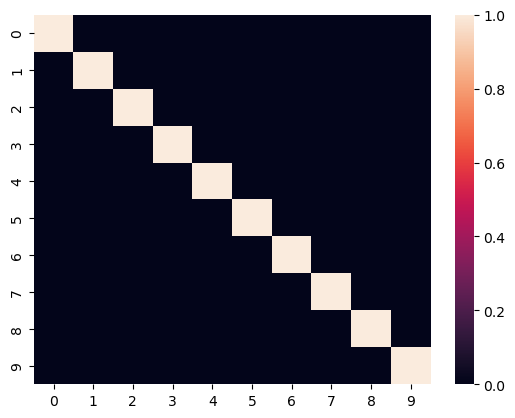

In [236]:
correlation_matrix: pd.DataFrame = pd.DataFrame(A_orthonormal).corr()
sns.heatmap(correlation_matrix)